In [191]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

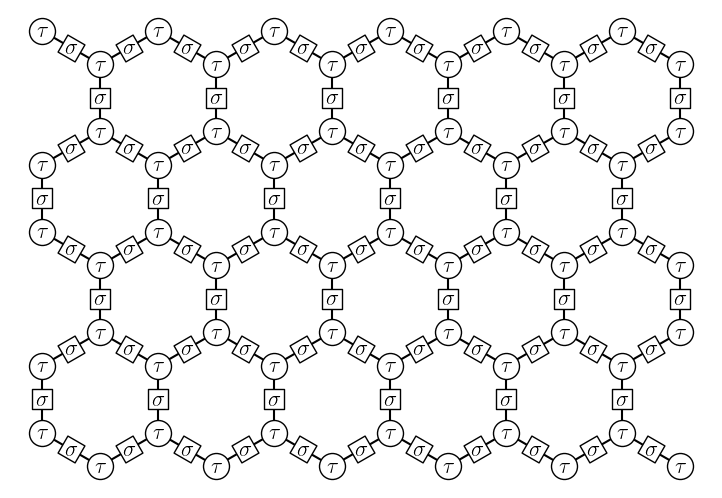

In [263]:
def draw_honeycomb_lattice(ncellsx, ncellsy, a=1):
    plt.rc("text", usetex=True)
    plt.rc("font", size=16)

    a0 = np.array([a/2, np.sqrt(3)*a/2])
    a1 = np.array([a/2, -np.sqrt(3)*a/2])
    
    bulk_plaquete_center_x = np.zeros((ncellsy, ncellsx+1))
    bulk_plaquete_center_y = np.zeros((ncellsy, ncellsx+1))
    bulk_nodes_x = np.zeros(2*ncellsy*(ncellsx+1))
    bulk_nodes_y = np.zeros(2*ncellsy*(ncellsx+1))
    lines_to_draw = []
    bulk_squares_x = []
    bulk_squares_y = []
    left_squares_x = []
    left_squares_y = []
    right_squares_x = []
    right_squares_y = []
    for row in range(ncellsy):
        for col in range(ncellsx+1):
            if (row == 0) and (col==0):
                this_plaquette_x = 0
                this_plaquette_y = 0
            elif col == 0:
                this_plaquette_x = bulk_plaquete_center_x[row-1, col] + a0[0]*(-1)**(1 + row % 2)
                this_plaquette_y = bulk_plaquete_center_y[row-1, col] + a0[1]
            else:
                this_plaquette_x = bulk_plaquete_center_x[row, col-1] + a0[0] + a1[0]
                this_plaquette_y = bulk_plaquete_center_y[row, col-1] + a0[1] + a1[1]
            nodes_index = 2*(row*(ncellsx+1) + col)
            bulk_plaquete_center_x[row, col] = this_plaquette_x
            bulk_plaquete_center_y[row, col] = this_plaquette_y
            bulk_nodes_x[nodes_index] = this_plaquette_x + 1/3*a0[0] + 2/3*a1[0]
            bulk_nodes_y[nodes_index] = this_plaquette_y + 1/3*a0[1] + 2/3*a1[1]
            bulk_nodes_x[nodes_index+1] = this_plaquette_x + 2/3*a0[0] + 1/3*a1[0]
            bulk_nodes_y[nodes_index+1] = this_plaquette_y + 2/3*a0[1] + 1/3*a1[1]
            lines_to_draw.append(([bulk_nodes_x[nodes_index], bulk_nodes_x[nodes_index+1]], [bulk_nodes_y[nodes_index], bulk_nodes_y[nodes_index+1]]))
            bulk_squares_x.append((bulk_nodes_x[nodes_index] + bulk_nodes_x[nodes_index+1])/2)
            bulk_squares_y.append((bulk_nodes_y[nodes_index] + bulk_nodes_y[nodes_index+1])/2)
            if row > 0:
                last_top_node_x = bulk_nodes_x[2*(ncellsx+1)*(row-1) + 2*col + 1]
                last_top_node_y = bulk_nodes_y[2*(ncellsx+1)*(row-1) + 2*col + 1]
                lines_to_draw.append(([last_top_node_x, bulk_nodes_x[nodes_index]], [last_top_node_y, bulk_nodes_y[nodes_index]]))
                if row % 2 == 0:
                    right_squares_x.append((last_top_node_x + bulk_nodes_x[nodes_index])/2)
                    right_squares_y.append(((last_top_node_y + bulk_nodes_y[nodes_index])/2))
                else:
                    left_squares_x.append((last_top_node_x + bulk_nodes_x[nodes_index])/2)
                    left_squares_y.append(((last_top_node_y + bulk_nodes_y[nodes_index])/2))
                if row % 2 != 0:
                    if col < ncellsx:
                        last_next_top_node_x = bulk_nodes_x[2*(ncellsx+1)*(row-1) + 2*col + 3]
                        last_next_top_node_y = bulk_nodes_y[2*(ncellsx+1)*(row-1) + 2*col + 3]
                        lines_to_draw.append(([last_next_top_node_x, bulk_nodes_x[nodes_index]], [last_next_top_node_y, bulk_nodes_y[nodes_index]]))
                        right_squares_x.append((last_next_top_node_x + bulk_nodes_x[nodes_index])/2)
                        right_squares_y.append((last_next_top_node_y + bulk_nodes_y[nodes_index])/2)
                else:
                    if col > 0:
                        last_previous_top_node_x = bulk_nodes_x[2*(ncellsx+1)*(row-1) + 2*(col-1) + 1]
                        last_previous_top_node_y = bulk_nodes_y[2*(ncellsx+1)*(row-1) + 2*(col-1) + 1]
                        lines_to_draw.append(([last_previous_top_node_x, bulk_nodes_x[nodes_index]], [last_previous_top_node_y, bulk_nodes_y[nodes_index]]))
                        left_squares_x.append((last_previous_top_node_x + bulk_nodes_x[nodes_index])/2)
                        left_squares_y.append((last_previous_top_node_y + bulk_nodes_y[nodes_index])/2)

    bottom_boundary_plaquette_center_x = np.zeros(ncellsx+1)
    bottom_boundary_plaquette_center_y = np.zeros(ncellsx+1)
    bottom_boundary_nodes_x = np.zeros(ncellsx+1)
    bottom_boundary_nodes_y = np.zeros(ncellsx+1)
    for col in range(ncellsx+1):
        bottom_boundary_plaquette_center_x[col] = bulk_plaquete_center_x[0, col] + a1[0]
        bottom_boundary_plaquette_center_y[col] = bulk_plaquete_center_y[0, col] + a1[1]
        bottom_boundary_nodes_x[col] = bottom_boundary_plaquette_center_x[col] + 2/3*a0[0] + 1/3*a1[0]
        bottom_boundary_nodes_y[col] = bottom_boundary_plaquette_center_y[col] + 2/3*a0[1] + 1/3*a1[1]
        previous_bottom_node_x = bulk_nodes_x[2*col]
        previous_bottom_node_y = bulk_nodes_y[2*col]
        lines_to_draw.append(([bottom_boundary_nodes_x[col], previous_bottom_node_x], [bottom_boundary_nodes_y[col], previous_bottom_node_y]))
        right_squares_x.append((bottom_boundary_nodes_x[col] + previous_bottom_node_x)/2)
        right_squares_y.append((bottom_boundary_nodes_y[col] + previous_bottom_node_y)/2)
        if col < ncellsx:
            next_bottom_node_x = bulk_nodes_x[2*(col+1)]
            next_bottom_node_y = bulk_nodes_y[2*(col+1)]
            lines_to_draw.append(([bottom_boundary_nodes_x[col], next_bottom_node_x], [bottom_boundary_nodes_y[col], next_bottom_node_y]))
            left_squares_x.append((bottom_boundary_nodes_x[col] + next_bottom_node_x)/2)
            left_squares_y.append((bottom_boundary_nodes_y[col] + next_bottom_node_y)/2)

    top_boundary_plaquette_center_x = np.zeros(ncellsx+1)
    top_boundary_plaquette_center_y = np.zeros(ncellsx+1)
    top_boundary_nodes_x = np.zeros(ncellsx+1)
    top_boundary_nodes_y = np.zeros(ncellsx+1)
    for col in range(ncellsx+1):
        top_boundary_plaquette_center_x[col] = bulk_plaquete_center_x[-1, col] + a0[0]
        top_boundary_plaquette_center_y[col] = bulk_plaquete_center_y[-1, col] + a0[1]
        top_boundary_nodes_x[col] = top_boundary_plaquette_center_x[col] + 1/3*a0[0] + 2/3*a1[0]
        top_boundary_nodes_y[col] = top_boundary_plaquette_center_y[col] + 1/3*a0[1] + 2/3*a1[1]
    
    top_boundary_nodes_x[1::] = top_boundary_nodes_x[:-1]
    top_boundary_nodes_y[1::] = top_boundary_nodes_y[:-1]
    top_boundary_nodes_x[0] = top_boundary_plaquette_center_x[0] - 2/3*a0[0] - 1/3*a1[0]
    top_boundary_nodes_y[0] = top_boundary_plaquette_center_y[0] - 2/3*a0[1] - 1/3*a1[1]

    for col in range(ncellsx+1):
        next_top_node_x = bulk_nodes_x[2*(ncellsx+1)*(ncellsy-1) + 2*col + 1]
        next_top_node_y = bulk_nodes_y[2*(ncellsx+1)*(ncellsy-1) + 2*col + 1]
        lines_to_draw.append(([next_top_node_x, top_boundary_nodes_x[col]], [next_top_node_y, top_boundary_nodes_y[col]]))
        right_squares_x.append((next_top_node_x + top_boundary_nodes_x[col])/2)
        right_squares_y.append((next_top_node_y + top_boundary_nodes_y[col])/2)
        if col > 0:
            previous_node_x = bulk_nodes_x[2*(ncellsx+1)*(ncellsy-1) + 2*(col-1) + 1]
            previous_node_y = bulk_nodes_y[2*(ncellsx+1)*(ncellsy-1) + 2*(col-1) + 1]
            lines_to_draw.append(([previous_node_x, top_boundary_nodes_x[col]], [previous_node_y, top_boundary_nodes_y[col]]))
            left_squares_x.append((previous_node_x + top_boundary_nodes_x[col])/2)
            left_squares_y.append((previous_node_y + top_boundary_nodes_y[col])/2)

    plaquette_centers_x = np.vstack((bottom_boundary_plaquette_center_x, bulk_plaquete_center_x, top_boundary_plaquette_center_x))
    plaquette_centers_y = np.vstack((bottom_boundary_plaquette_center_y, bulk_plaquete_center_y, top_boundary_plaquette_center_y))
    nodes_x = np.concatenate((bottom_boundary_nodes_x, bulk_nodes_x, top_boundary_nodes_x))
    nodes_y = np.concatenate((bottom_boundary_nodes_y, bulk_nodes_y, top_boundary_nodes_y))

    fig, ax = plt.subplots(figsize=[1.5*ncellsx, 1.5*(ncellsy+1)])
    ax.set_aspect('equal')
    for line in lines_to_draw:
        plt.plot(line[0], line[1], color="black")
    plt.scatter(nodes_x, nodes_y, 350, marker="o", c="white", edgecolors="black", zorder=2)
    plt.scatter(bulk_squares_x, bulk_squares_y, 400, marker=(4, 0, 45), c="white", edgecolors="black", zorder=2)
    plt.scatter(left_squares_x, left_squares_y, 400, marker=(4, 0, -15), c="white", edgecolors="black", zorder=2)
    plt.scatter(right_squares_x, right_squares_y, 400, marker=(4, 0, 15), c="white", edgecolors="black", zorder=2)
    translate_bulk = mpl.transforms.Affine2D().translate(0.4, -0.2)
    translate_diag = mpl.transforms.Affine2D().translate(0, 0.5)
    for x, y in zip(nodes_x, nodes_y):
        plt.text(x, y, r"$\tau$", horizontalalignment="center", verticalalignment="center")
    for x, y in zip(bulk_squares_x, bulk_squares_y):
        text = plt.text(x, y, r"$\sigma$", horizontalalignment="center", verticalalignment="center")
        text.set_transform(text.get_transform() + translate_bulk)
    for x, y in zip(left_squares_x + right_squares_x, left_squares_y + right_squares_y):
        text = plt.text(x, y, r"$\sigma$", horizontalalignment="center", verticalalignment="center")
        text.set_transform(text.get_transform() + translate_diag)
    plt.axis("off")
    plt.tight_layout()

draw_honeycomb_lattice(5, 4)
plt.savefig("honeycomb.pdf", facecolor="none", bbox_inches="tight")